----
# Laboratorium 10 - Filtry analogowe, część 1

----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskie

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy`, `matplotlib`, `imageio` oraz `scipy.signal`.
### 0.2. Przypomnienie wiadomości o filtrach analogowych
### 0.3. Moduł transmitancji i tłumienie
### 0.4.  Gabaryty filtru
### 0.5.  Aproksymacje Butterwortha, Czebyszewa (1 i 2 rodzaju) i Cauera (eliptyczna)


In [9]:
%matplotlib inline
import sympy 
import scipy.signal 
import numpy as np
import matplotlib.pyplot as plt 



----

### Zadanie 1

Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Butterwortha   
    - rząd filtru n (dla n od 1 do 5)  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

Podpowiedz:  
    - wykorzystaj funkcję `scipy.signal.butter`, pamiętaj aby zaprojektować filtr analogowy  
    - do wyznaczenia próbek transmitancji uzyj funkcji `scipy.signal.freqs`

Tłumienie dla n= 1 wynosi 5.988230
Tłumienie dla n= 2 wynosi 12.040793
Tłumienie dla n= 3 wynosi 18.061795
Tłumienie dla n= 4 wynosi 24.082400
Tłumienie dla n= 5 wynosi 30.103000


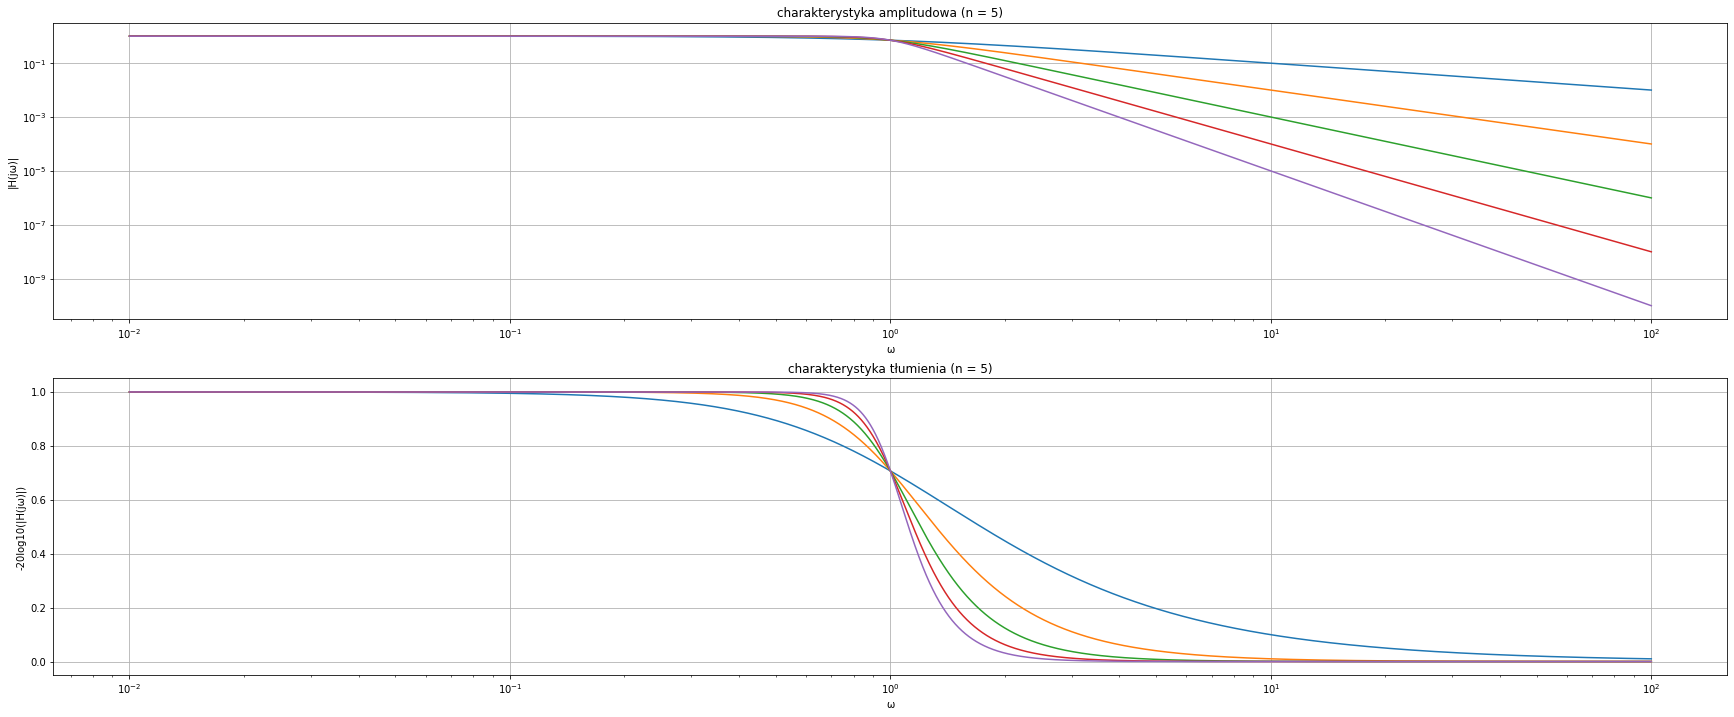

In [10]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)
#rysunki charakterystyk filtrów o danym rzędzie i
for i in range(1,n+1):    
    #design filter
    b, a = scipy.signal.butter(i, wp, 'low', analog=True) #b-licznik transmitancji, a-mianownik
    #calculate transmitance samples and magnitude characteristic - próbki transmitancji i charakterystyka amplitudowa
    w, H = scipy.signal.freqs(b, a, w)
    Mod = np.abs(H)
    #calculate Attenuation  - obliczneie tłumienia
    L = -20 * np.log10(Mod) #z minusem bo amplituda sygnału spada
    #calculate attenuation per octave - tłumienie na oktawę, oktawa - dwukrotny wzrost częstotliwości
    #bierzemy oczywiście częstotliwości z poza pasma przepsutowego
    w1 = 10
    w2 = 20
    H1 = np.polyval(b,w1)/np.polyval(a,w1*1j) #transmitancja w punkcie dla częstotlwości w1., 
    H2 = np.polyval(b,w2)/np.polyval(a,w2*1j) #transmitancja w punkcie dla częstotlwości w2
    Mod1 = np.abs(H1)
    Mod2 = np.abs(H2)
    L1 = -20 * np.log10(Mod1)
    L2 = -20 * np.log10(Mod2)
    L_oct = L2 - L1
    print('Tłumienie dla n= %d wynosi %f'%(i, L_oct)) # %d - liczba całkowita, %f - float -> ładne wyśiwetlanie w linii
    #display magnitude characteristic - wyświetlnie charakterystyki amplitudowej
    axs[0].loglog(w,  Mod) #skala logarytmiczna
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[0].legend
    axs[1].semilogx(w, Mod) #skala półlogarytmiczna
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()
    axs[1].legend


Tłumienie dla n= 1 wynosi -0.032370
Tłumienie dla n= 2 wynosi -0.000407
Tłumienie dla n= 3 wynosi -0.000004
Tłumienie dla n= 4 wynosi -0.000000
Tłumienie dla n= 5 wynosi -0.000000


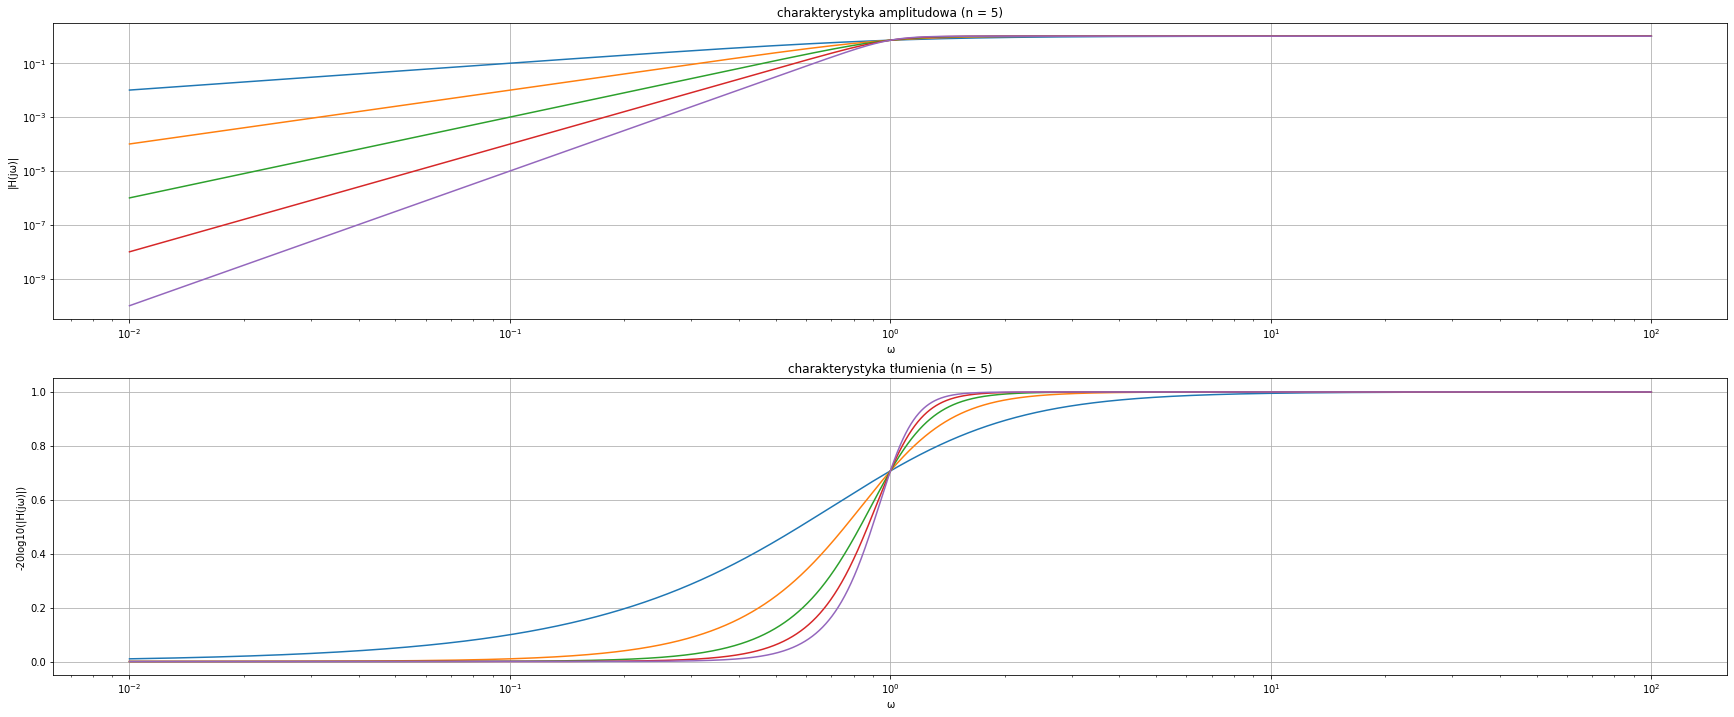

In [11]:
#DLA FILTRÓW WYSOKO zmiana 'low' na 'high'
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)
#rysunki charakterystyk filtrów o danym rzędzie i
for i in range(1,n+1):    
    #design filter
    b, a = scipy.signal.butter(i, wp, 'high', analog=True) #b-licznik transmitancji, a-mianownik
    #calculate transmitance samples and magnitude characteristic - próbki transmitancji i charakterystyka amplitudowa
    w, H = scipy.signal.freqs(b, a, w)
    Mod = np.abs(H)
    #calculate Attenuation  - obliczneie tłumienia
    L = -20 * np.log10(Mod) #z minusem bo amplituda sygnału spada
    #calculate attenuation per octave - tłumienie na oktawę, oktawa - dwukrotny wzrost częstotliwości
    #bierzemy oczywiście częstotliwości z poza pasma przepsutowego
    w1 = 10
    w2 = 20
    H1 = np.polyval(b,w1)/np.polyval(a,w1*1j) #transmitancja w punkcie dla częstotlwości w1., 
    H2 = np.polyval(b,w2)/np.polyval(a,w2*1j) #transmitancja w punkcie dla częstotlwości w2
    Mod1 = np.abs(H1)
    Mod2 = np.abs(H2)
    L1 = -20 * np.log10(Mod1)
    L2 = -20 * np.log10(Mod2)
    L_oct = L2 - L1
    print('Tłumienie dla n= %d wynosi %f'%(i, L_oct)) # %d - liczba całkowita, %f - float -> ładne wyśiwetlanie w linii
    #display magnitude characteristic - wyświetlnie charakterystyki amplitudowej
    axs[0].loglog(w,  Mod) #skala logarytmiczna
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[0].legend
    axs[1].semilogx(w, Mod) #skala półlogarytmiczna
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()
    axs[1].legend


### Zadanie 2

Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Czebyszewa I rodzaju   
    - rząd filtru n (dla n od 1 do 5)  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

Podpowiedź:  
    - wykorzystaj funkcję `scipy.signal.cheby1`, pamiętaj aby zaprojektować filtr analogowy, maksymalne tętnienie (rp, ripple) oznacza  maksymalne tłumienie w paśmie przepustowym  
    - do wyznaczenia próbek transmitancji uzyj funkcji `scipy.signal.freqs`

Tłumienie dla n= 1 wynosi 5.897759
Tłumienie dla n= 2 wynosi 12.073477
Tłumienie dla n= 3 wynosi 18.110887
Tłumienie dla n= 4 wynosi 24.147851
Tłumienie dla n= 5 wynosi 30.184814


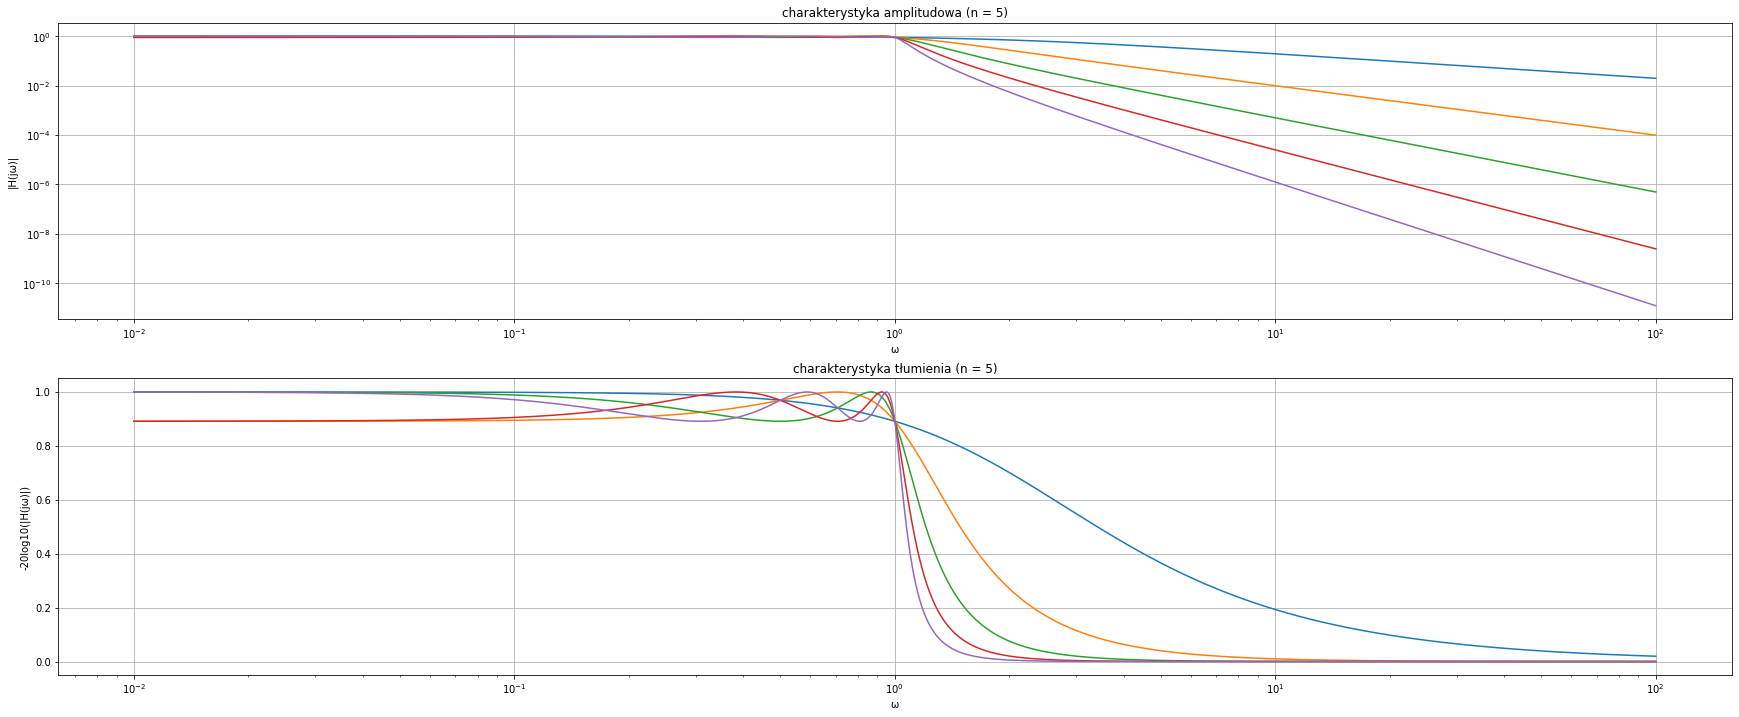

In [12]:
n  = 5
wp = 1 #pulsacja graniczna
rp = 1 #ripple
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)
#rysunki charakterystyk filtrów o danym rzędzie i
for i in range(1,n+1):    
    #design filter
    b, a = scipy.signal.cheby1(i, rp, wp, 'low', analog=True) #b-licznik transmitancji, a-mianownik
    #calculate transmitance samples and magnitude characteristic - próbki transmitancji i charakterystyka amplitudowa
    w, H = scipy.signal.freqs(b, a, w)
    Mod = np.abs(H)
    #calculate Attenuation  - obliczneie tłumienia
    L = -20 * np.log10(Mod) #z minusem bo amplituda sygnału spada
    #calculate attenuation per octave - tłumienie na oktawę, oktawa - dwukrotny wzrost częstotliwości
    #bierzemy oczywiście częstotliwości z poza pasma przepsutowego
    w1 = 10
    w2 = 20
    H1 = np.polyval(b,w1)/np.polyval(a,w1*1j) #transmitancja w punkcie dla częstotlwości w1., 
    H2 = np.polyval(b,w2)/np.polyval(a,w2*1j) #transmitancja w punkcie dla częstotlwości w2
    Mod1 = np.abs(H1)
    Mod2 = np.abs(H2)
    L1 = -20 * np.log10(Mod1)
    L2 = -20 * np.log10(Mod2)
    L_oct = L2 - L1
    print('Tłumienie dla n= %d wynosi %f'%(i, L_oct)) # %d - liczba całkowita, %f - float -> ładne wyśiwetlanie w linii
    #display magnitude characteristic - wyświetlnie charakterystyki amplitudowej
    axs[0].loglog(w,  Mod) #skala logarytmiczna
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[0].legend
    axs[1].semilogx(w, Mod) #skala półlogarytmiczna
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()
    axs[1].legend


Tłumienie dla n= 1 wynosi -5.561290
Tłumienie dla n= 2 wynosi -12.166583
Tłumienie dla n= 3 wynosi -18.260905
Tłumienie dla n= 4 wynosi -24.347978
Tłumienie dla n= 5 wynosi -30.434974


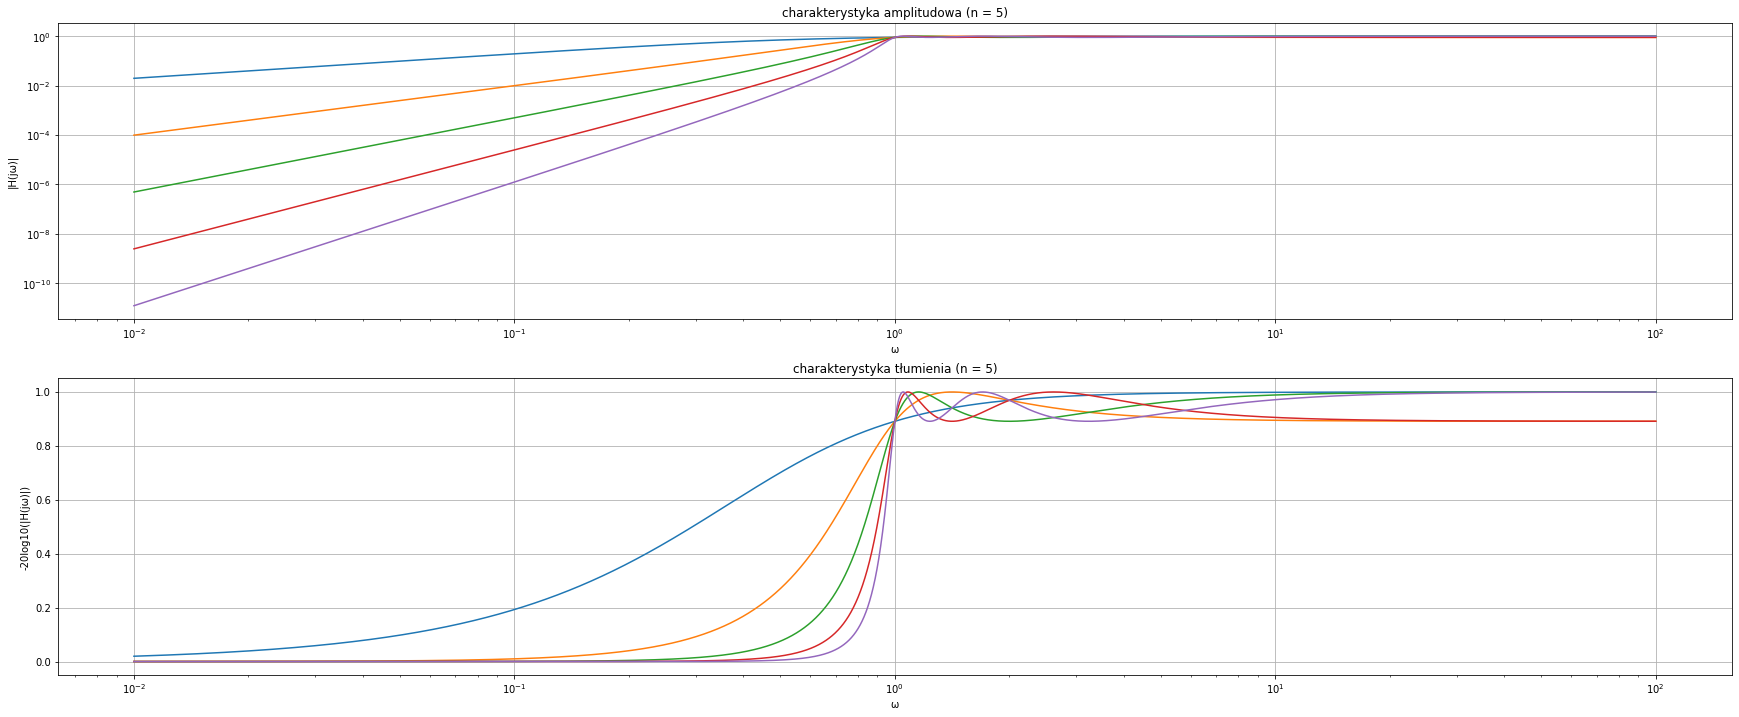

In [21]:
n  = 5
wp = 1 #pulsacja graniczna
rp = 1 #ripple
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)
#rysunki charakterystyk filtrów o danym rzędzie i
for i in range(1,n+1):    
    #design filter
    b, a = scipy.signal.cheby1(i, rp, wp, 'high', analog=True) #b-licznik transmitancji, a-mianownik
    #calculate transmitance samples and magnitude characteristic - próbki transmitancji i charakterystyka amplitudowa
    w, H = scipy.signal.freqs(b, a, w)
    Mod = np.abs(H)
    #calculate Attenuation  - obliczneie tłumienia
    L = -20 * np.log10(Mod) #z minusem bo amplituda sygnału spada
    #calculate attenuation per octave - tłumienie na oktawę, oktawa - dwukrotny wzrost częstotliwości
    #bierzemy oczywiście częstotliwości z poza pasma przepsutowego
    w1 = 0.10
    w2 = 0.20
    H1 = np.polyval(b,w1)/np.polyval(a,w1*1j) #transmitancja w punkcie dla częstotlwości w1., 
    H2 = np.polyval(b,w2)/np.polyval(a,w2*1j) #transmitancja w punkcie dla częstotlwości w2
    Mod1 = np.abs(H1)
    Mod2 = np.abs(H2)
    L1 = -20 * np.log10(Mod1)
    L2 = -20 * np.log10(Mod2)
    L_oct = L2 - L1
    print('Tłumienie dla n= %d wynosi %f'%(i, L_oct)) # %d - liczba całkowita, %f - float -> ładne wyśiwetlanie w linii
    #display magnitude characteristic - wyświetlnie charakterystyki amplitudowej
    axs[0].loglog(w,  Mod) #skala logarytmiczna
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[0].legend
    axs[1].semilogx(w, Mod) #skala półlogarytmiczna
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()
    axs[1].legend


### Zadanie 3  
Porównać charakterystyki amplitudowe i fazowe dla aproksymacji Butterwortha i Czebyszewa I rodzaju:
    - rząd filtru n = 5  
    - pulsacja graniczna ω=1 rad/s  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie)  
    - wykreślić charakterystyki fazowe (na jednym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

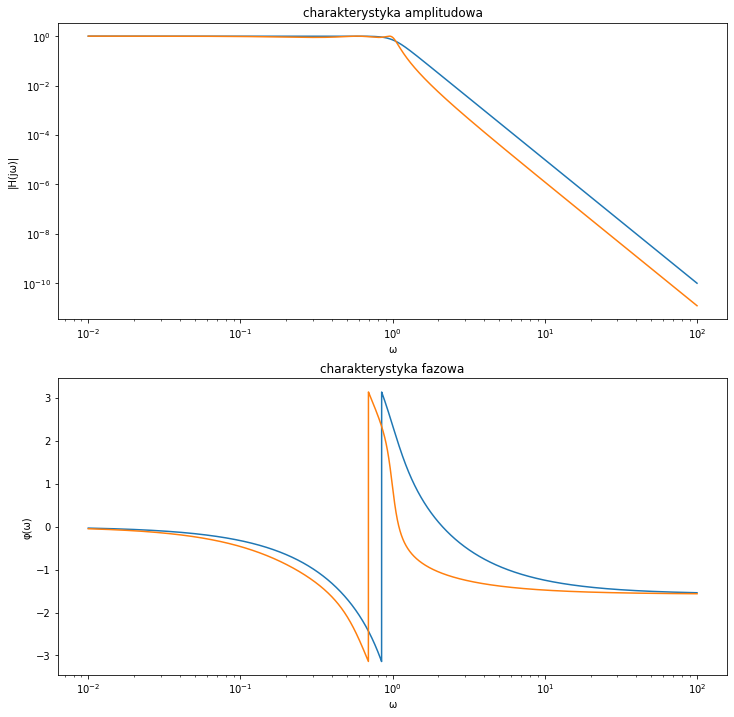

In [14]:
#CHARAKTERYSTKI DLA FILTRÓW 5 - RZĘDU
n  = 5 
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[12,12])    
#log w vector
w = np.logspace(-2,2,10000)

#Butterworth
#design filter
#design filter
b, a = scipy.signal.butter(n, wp, 'low', analog=True) #b-licznik transmitancji, a-mianownik
#calculate transmitance samples and magnitude characteristic - próbki transmitancji i charakterystyka amplitudowa
w, H = scipy.signal.freqs(b, a, w)
#module butter
Mod_Butter = np.abs(H)
#calculate phase butter
Phase_Butter = np.angle(H)

#display magnitude characteristic
axs[0].loglog(w,  Mod_Butter)
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w,  Phase_Butter)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()

#cheby
#design filter
b, a = scipy.signal.cheby1(i, rp, wp, 'low', analog=True) #b-licznik transmitancji, a-mianownik
#calculate transmitance samples and magnitude characteristic - próbki transmitancji i charakterystyka amplitudowa
w, H = scipy.signal.freqs(b, a, w)
#module cheby_1
Mod_cheby_1 = np.abs(H)
#calculate phase cheby_1
Phase_cheby_1 = np.angle(H)

#display magnitude characteristic
axs[0].loglog(w, Mod_cheby_1) 
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w, Phase_cheby_1)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()

#WNIOSEK
#Filtr Czebyszewa_1, szybciej tłumi w paśmie przejściowym, ale ma oscylacje w paśmie przepustowym.
#Butterwortha, ma bardziej płaską charakterystykę w paśmie przepustowym, ale ma dłuższe pasmo przejściowe.

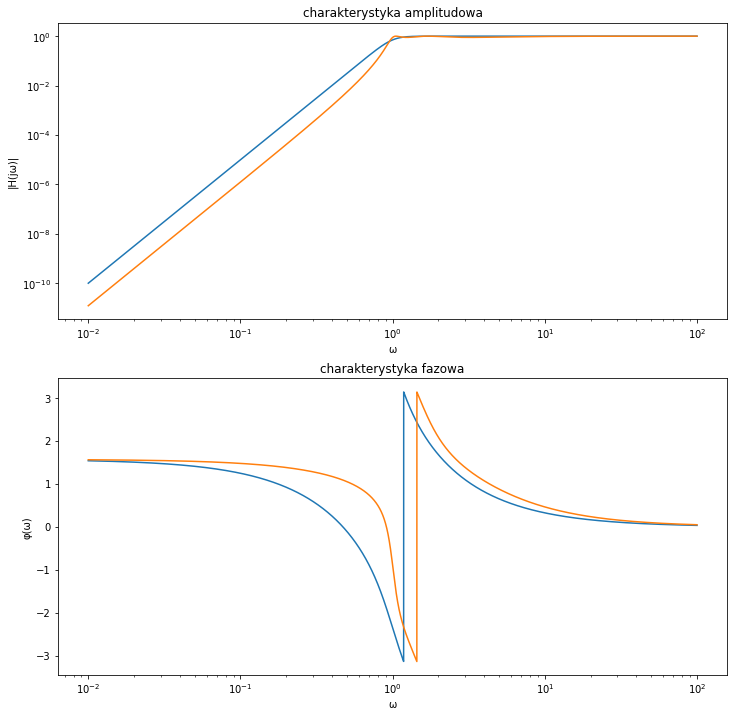

In [22]:
#CHARAKTERYSTKI DLA FILTRÓW 5 - RZĘDU
n  = 5 
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[12,12])    
#log w vector
w = np.logspace(-2,2,10000)

#Butterworth
#design filter
#design filter
b, a = scipy.signal.butter(n, wp, 'high', analog=True) #b-licznik transmitancji, a-mianownik
#calculate transmitance samples and magnitude characteristic - próbki transmitancji i charakterystyka amplitudowa
w, H = scipy.signal.freqs(b, a, w)
#module butter
Mod_Butter = np.abs(H)
#calculate phase butter
Phase_Butter = np.angle(H)

#display magnitude characteristic
axs[0].loglog(w,  Mod_Butter)
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w,  Phase_Butter)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()

#cheby
#design filter
b, a = scipy.signal.cheby1(i, rp, wp, 'high', analog=True) #b-licznik transmitancji, a-mianownik
#calculate transmitance samples and magnitude characteristic - próbki transmitancji i charakterystyka amplitudowa
w, H = scipy.signal.freqs(b, a, w)
#module cheby_1
Mod_cheby_1 = np.abs(H)
#calculate phase cheby_1
Phase_cheby_1 = np.angle(H)

#display magnitude characteristic
axs[0].loglog(w, Mod_cheby_1) 
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w, Phase_cheby_1)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()

#WNIOSEK
#Filtr Czebyszewa_1, szybciej tłumi w paśmie przejściowym, ale ma oscylacje w paśmie przepustowym.
#Butterwortha, ma bardziej płaską charakterystykę w paśmie przepustowym, ale ma dłuższe pasmo przejściowe.
#CHARAKTERYSTYK AMPLITUDOWA FILTRA GÓRNOPRZEPUSTOWEGO JEST SYMETRYCZNYM ODBICIEM TEJ FILTRA DOLNOPRZEPUSTOWEGO względem pulsacji granicznej
#CHARAKTERYSTYK FAZOWA JEST IDENTYCZNA

### Zadanie 4

Wyznaczanie minimalnego wymaganego rzędu filtru:  
 ### gabaryty: 
 - a)   αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s  
 - b)   αp= 0,5 dB, αs= 100 dB, ωp= 2 rad/s, ωs= 3 rad/s
### filtry:  
 - Butterwortha
 - Czebyszewa I rodzaju
 - Czebyszewa II rodzaju
 - Cauer (eliptyczny)

### Podpowiedź : 
 - użyj funkcji: `scipy.signal.buttord`, `scipy.signal.cheb1ord`, `scipy.signal.cheb2ord`, `scipy.signal.ellipord`

In [15]:
# αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s 
a_butt = scipy.signal.buttord (wp = 3,ws = 8, gpass = 3, gstop = 80, analog=True)[0]
a_cheby1 = scipy.signal.cheb1ord(wp = 3,ws = 8, gpass = 3, gstop = 80, analog=True)[0]
a_cheby2, w_n_cheby2 = scipy.signal.cheb2ord(wp = 3,ws = 8, gpass = 3, gstop = 80, analog=True)
a_ellip, w_n_ellip = scipy.signal.ellipord(wp = 3,ws = 8, gpass = 3, gstop = 80, analog=True)
#ap = 0,5dB, as = 100dB, wp = 2rad/s, ws = 3rad/s
a_butt = scipy.signal.buttord (wp = 2,ws = 3, gpass = 0.5, gstop = 100, analog=True)[0]
a_cheby1 = scipy.signal.cheb1ord(wp = 2,ws = 3, gpass = 0.5, gstop = 100, analog=True)[0]
a_cheby2, w_n_cheby2 = scipy.signal.cheb2ord(wp = 2,ws = 3, gpass = 0.5, gstop = 100, analog=True)
a_ellip, w_n_ellip = scipy.signal.ellipord(wp = 2,ws = 3, gpass = 0.5, gstop = 100, analog=True)
#WNIOSEK
#DLA OBU TYPÓW FILTRÓW BĘDZIE TEN SAM RZĄD PRZY TYCH SAMYCH GABARYTACH, TRZEBA TYLKO ZAMIENIĆ WSPÓŁCZYNNIKI (CO FUNKCJA ZROBI SAMA)




### Zadanie 5   

Korzystając z napisanej w zadaniu 5 funkcji powtórz zadania 1-4 dla filtru górnoprzepustowego.

### Podpowiedź 
- zmień parametr `btype` poszczególnych funkcji na "high"
- pamiętaj, aby zmienić pulsację przy wyznaczniu tłumienia na oktawę tak, aby obliczać je w obszarze zaporowym
 

### Zadanie 6 

Napisz funkcję:
 - wyliczającą rząd filtru dla danej aproksymacji 
 - projektującą filtr (transmitancja) 
 - wykreślanie charakterystyk amplitudowych filtrów wraz z liniami odpowiadającymi gabarytom filtrów 

#### Paniętaj, że dla filtru Czebyszewa II typu, funkcja projektująca transmitancję filtru przyjmuje wartość `ws` jako argument o nazwie `wn` (patrz dokumentacja)

Wyświetl filtry a) i b) z zadania 4 dla wszystkich aproksymacji (na jednym wykresie charakterystyki dla danych gabarytów)

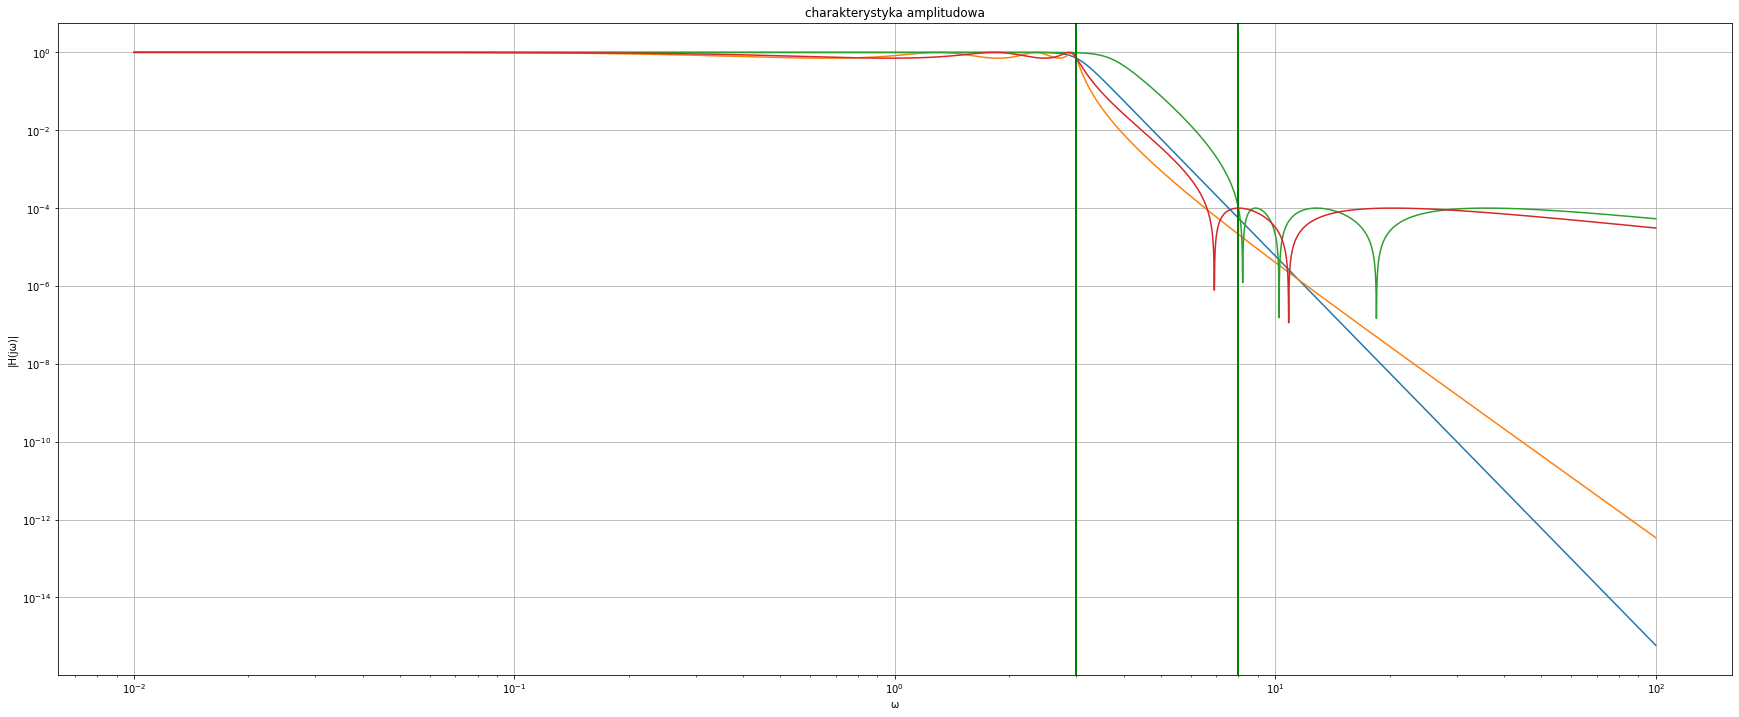

In [16]:
fig, axs = plt.subplots(1, 1, figsize=[6*n,12])  
def designFilter(charType,type, wp, ws, gpass, gstop, rp,  rs) : 
    #order
    w = np.logspace(-2,2,10000)
    #oblcizenie rzędów
    N_butter = scipy.signal.buttord (wp, ws, gpass, gstop, analog=True)[0]
    N_cheby_1 = scipy.signal.cheb1ord(wp ,ws, gpass, gstop, analog=True)[0]
    N_cheby_2, w_n_cheby2 = scipy.signal.cheb2ord(wp, ws, gpass, gstop, analog=True)
    N_ellip, w_n_ellip = scipy.signal.ellipord(wp,ws,gpass, gstop, analog=True)
    #zapisujemy nasze rzędy w tablicę
    Order_table = [N_butter, N_cheby_1, N_cheby_2, N_ellip] 
    #odpowiednio wyznaczamy transmitancje poszczególnych filtórw
    for i in range (4):
        if(i == 0):
              b, a = scipy.signal.butter(Order_table[i], wp, type, analog=True) #butterworth
        elif(i == 1):
              b, a = scipy.signal.cheby1(Order_table[i], gpass, wp, type, analog=True) #cheby_1
        elif(i == 2):
              b, a = scipy.signal.cheby2(Order_table[i], gstop, ws, type, analog=True) #cheby_2
        else: b, a = scipy.signal.ellip(Order_table[i], gpass, gstop, wp, type, analog=True)
       
        #charakterystki
        w, H = scipy.signal.freqs(b, a, w)
        Mod = np.abs(H)
        #display characteristics
        axs.loglog(w,  Mod)
        axs.set_title("charakterystyka amplitudowa")
        axs.set_xlabel("ω")
        axs.set_ylabel("|H(jω)|")
        axs.grid(b=True)
        axs.axvline(wp, color='green') #częstotliwość graniczna pasma przepustowego
        axs.axvline(ws, color='green') #częstotliwość graniczna pasma zaporowego

designFilter(charType = 'butt',type = 'low', wp = 3,ws = 8, gpass = 3, gstop = 80, rp=3, rs=1)
#wp - częstotliwośC  graniczna przepustowa
#ws - częstotliwośC  graniczna zaporowa
#gpass - maksymalne tłumienie w paśmie przepustowym (jak najmniejsze) w scipy rp - chyba
#gstop - minimalne tłumienie w paśmie zaporowym w scipy rs


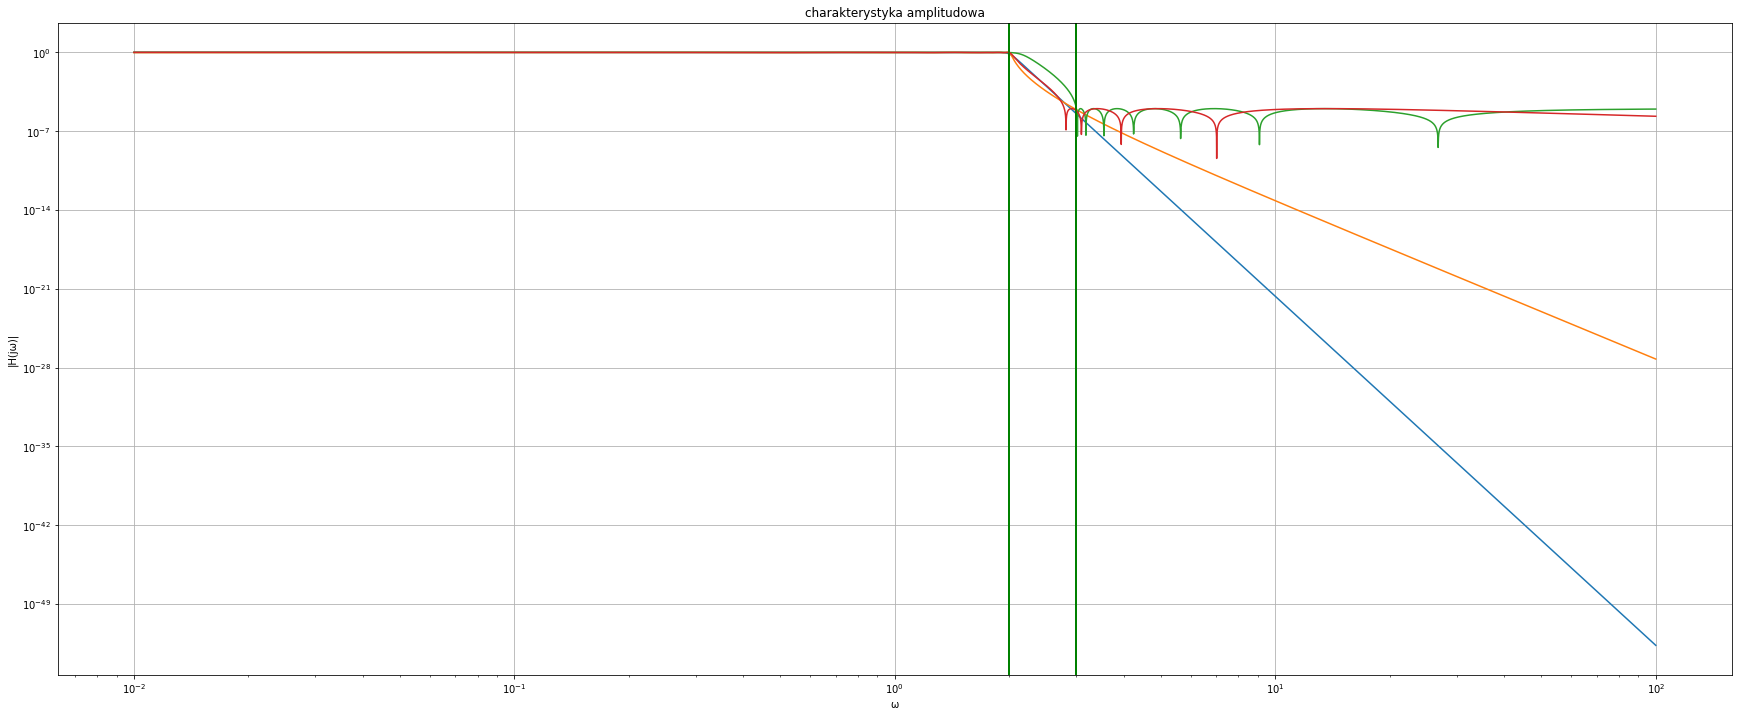

In [17]:
fig, axs = plt.subplots(1, 1, figsize=[6*n,12])  
def designFilter(charType,type, wp, ws, gpass, gstop, rp,  rs) : 
    #order
    w = np.logspace(-2,2,10000)
    #oblcizenie rzędów
    N_butter = scipy.signal.buttord (wp, ws, gpass, gstop, analog=True)[0]
    N_cheby_1 = scipy.signal.cheb1ord(wp ,ws, gpass, gstop, analog=True)[0]
    N_cheby_2, w_n_cheby2 = scipy.signal.cheb2ord(wp, ws, gpass, gstop, analog=True)
    N_ellip, w_n_ellip = scipy.signal.ellipord(wp,ws,gpass, gstop, analog=True)
    #zapisujemy nasze rzędy w tablicę
    Order_table = [N_butter, N_cheby_1, N_cheby_2, N_ellip] 
    #odpowiednio wyznaczamy transmitancje poszczególnych filtórw
    for i in range (4):
        if(i == 0):
              b, a = scipy.signal.butter(Order_table[i], wp, type, analog=True) #butterworth
        elif(i == 1):
              b, a = scipy.signal.cheby1(Order_table[i], gpass, wp, type, analog=True) #cheby_1
        elif(i == 2):
              b, a = scipy.signal.cheby2(Order_table[i], gstop, ws, type, analog=True) #cheby_2
        else: b, a = scipy.signal.ellip(Order_table[i], gpass, gstop, wp, type, analog=True)
       
        #charakterystki
        w, H = scipy.signal.freqs(b, a, w)
        Mod = np.abs(H)
        #display characteristics
        axs.loglog(w,  Mod)
        axs.set_title("charakterystyka amplitudowa")
        axs.set_xlabel("ω")
        axs.set_ylabel("|H(jω)|")
        axs.grid(b=True)
        axs.axvline(wp, color='green') #częstotliwość graniczna pasma przepustowego
        axs.axvline(ws, color='green') #częstotliwość graniczna pasma zaporowego

designFilter(charType = 'butt',type = 'low', wp = 2, ws = 3, gpass = 0.5, gstop = 100, rp=3, rs=1)
#wp - częstotliwośC  graniczna przepustowa
#ws - częstotliwośC  graniczna zaporowa
#gpass - maksymalne tłumienie w paśmie przepustowym (jak najmniejsze) w scipy rp - chyba
#gstop - minimalne tłumienie w paśmie zaporowym w scipy rs
